<a href="https://colab.research.google.com/github/AchrafAsh/ml-projects/blob/main/timeseries_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (8, 5), 'figure.dpi': 120})

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [4]:
# or import as pandas.Series with date being the index
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv", parse_dates=['date'], index_col="date")
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


[Text(0, 0.5, 'value'),
 Text(0.5, 1.0, 'Monthly anti-diabetic drug sales in Australia from 1992 to 2008')]

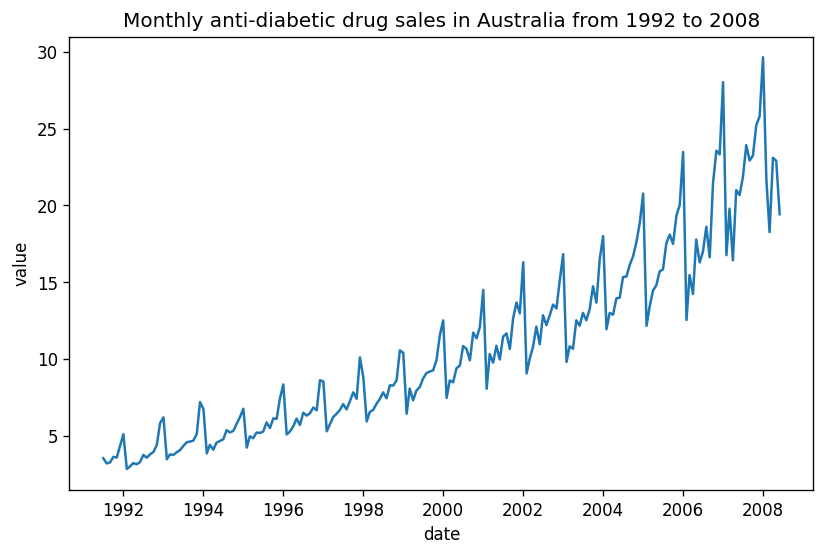

In [17]:
sns.lineplot(x=df.index, y=df.values[:,0]).set(title="Monthly anti-diabetic drug sales in Australia from 1992 to 2008", ylabel="value")

Grouping data by periods (weekly, monthly, etc)

In [23]:
df["year"] = [d.year for d in df.index]
df["month"] = [d.month for d in df.index]
years = df["year"].unique()

In [25]:
years

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008])

Ploting the aggregated values

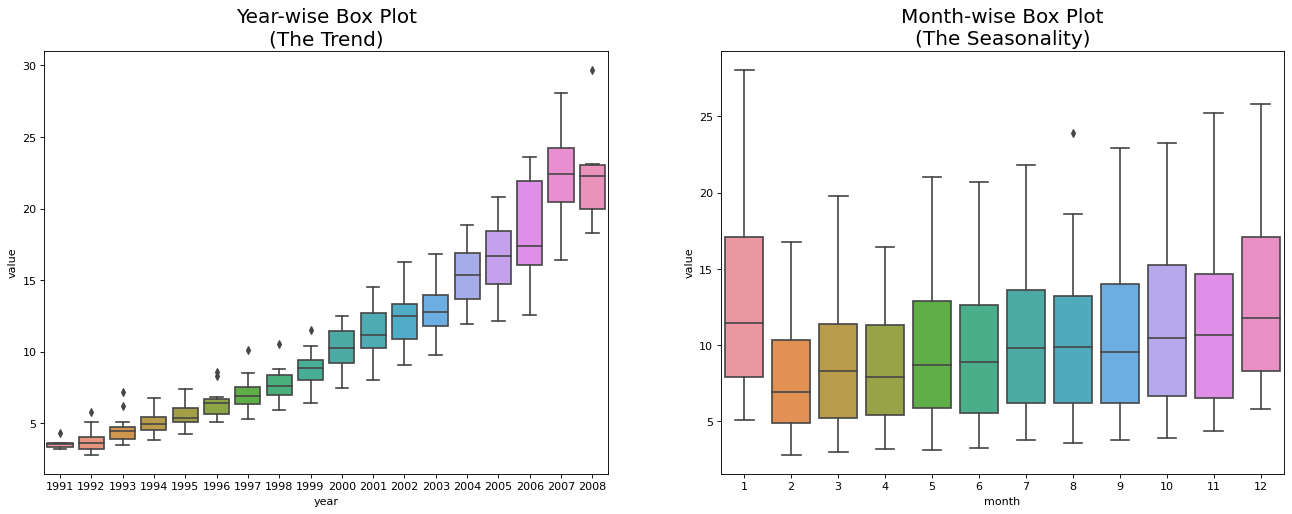

In [27]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()